In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
pbmc = pd.read_csv("pbmc_poly_a_counts.csv")
skin = pd.read_csv("skin_poly_a_counts.csv")
symbols = pd.read_csv("symbols.csv", index_col = 0)

In [6]:
symbols

,symbol
ENSG00000277519,OFD1P16Y
ENSG00000230033,ENSG00000230033
ENSG00000229571,PRAMEF25
ENSG00000287265,ENSG00000287265
ENSG00000276769,MIR6752
...,...
ENSG00000287591,ENSG00000287591
ENSG00000242324,ENSG00000242324
ENSG00000047849,MAP4
ENSG00000184508,HDDC3


In [7]:
pbmc_non_zero_genes = pbmc[pbmc.T.aggregate(sum) != 0]
skin_non_zero_genes = skin[skin.T.aggregate(sum) != 0]

common_genes = pbmc_non_zero_genes.index.intersection(skin_non_zero_genes.index)

In [8]:
len(set(common_genes))

33095

In [54]:
# genes in globin clear not in non-globin clear
globin_clear_unique = set(pbmc_non_zero_genes.index) - set(common_genes)

# genes in non-globin clear in globin clear
non_globin_clear_unique = set(skin_non_zero_genes.index) - set(common_genes)

In [56]:
# number of globin clear unique genes
len(globin_clear_unique)

4382

In [81]:
symbols.loc[pd.Series(list(globin_clear_unique)).apply(lambda x: x[:x.index('.')]).values].to_csv("globin_clear_unique.csv")

In [57]:
# number of non-globin clear unique genes
len(non_globin_clear_unique)

2403

In [82]:
symbols.loc[pd.Series(list(non_globin_clear_unique)).apply(lambda x: x[:x.index('.')]).values].to_csv("non_globin_clear_unique.csv")

In [18]:
pbmc_total_counts = pbmc.aggregate(sum)
pbmc_non_zero_genes = pbmc.aggregate(lambda x: sum(x>0))

skin_total_counts = skin.aggregate(sum)
skin_non_zero_genes = skin.aggregate(lambda x: sum(x>0))

In [20]:
df = pd.DataFrame([pbmc_non_zero_genes, skin_non_zero_genes]).T
df.columns = ["Globin Depleted", "No Globin Depletion"]
df["gene change"] = df['Globin Depleted'] - df['No Globin Depletion']

In [21]:
df

,Globin Depleted,No Globin Depletion,gene change
HS_299,26369,24692,1677
HS_644,24746,20805,3941
HS_672,26973,25767,1206
HS_678,23853,20075,3778
HS_694,26058,24995,1063
HS_696,26539,25436,1103
HS_698,24336,25070,-734
HS_701,27521,24928,2593
HS_702,27362,26129,1233
HS_703,27087,24930,2157


In [69]:
df['percentage_diff'] = ((df["Globin Depleted"] - df["No Globin Depletion"]) / df["No Globin Depletion"]) * 100
annot_data = np.tile(df['percentage_diff'].values, (2,1))

In [90]:
df['percentage_diff'].describe()

count    10.000000
mean      7.866857
std       6.773664
min      -2.927802
25%       4.422382
50%       5.755284
75%       9.964525
max      18.942562
Name: percentage_diff, dtype: float64

In [70]:
annot_data = annot_data.astype(str)

annot_data[1] = [''] * annot_data[1].shape[0]

annot_data[0] = list(map(lambda x: '+ ' + str(round(float(x), 2)) + '%',list(annot_data[0])))

In [71]:
annot_data

array([['+ 6.79%', '+ 18.94%', '+ 4.68%', '+ 18.82%', '+ 4.25%',
        '+ 4.34%', '+ -2.93%', '+ 10.4%', '+ 4.72%', '+ 8.65%'],
       ['', '', '', '', '', '', '', '', '', '']], dtype='<U32')

Text(0.5, 1.0, '                Mapped Genes')

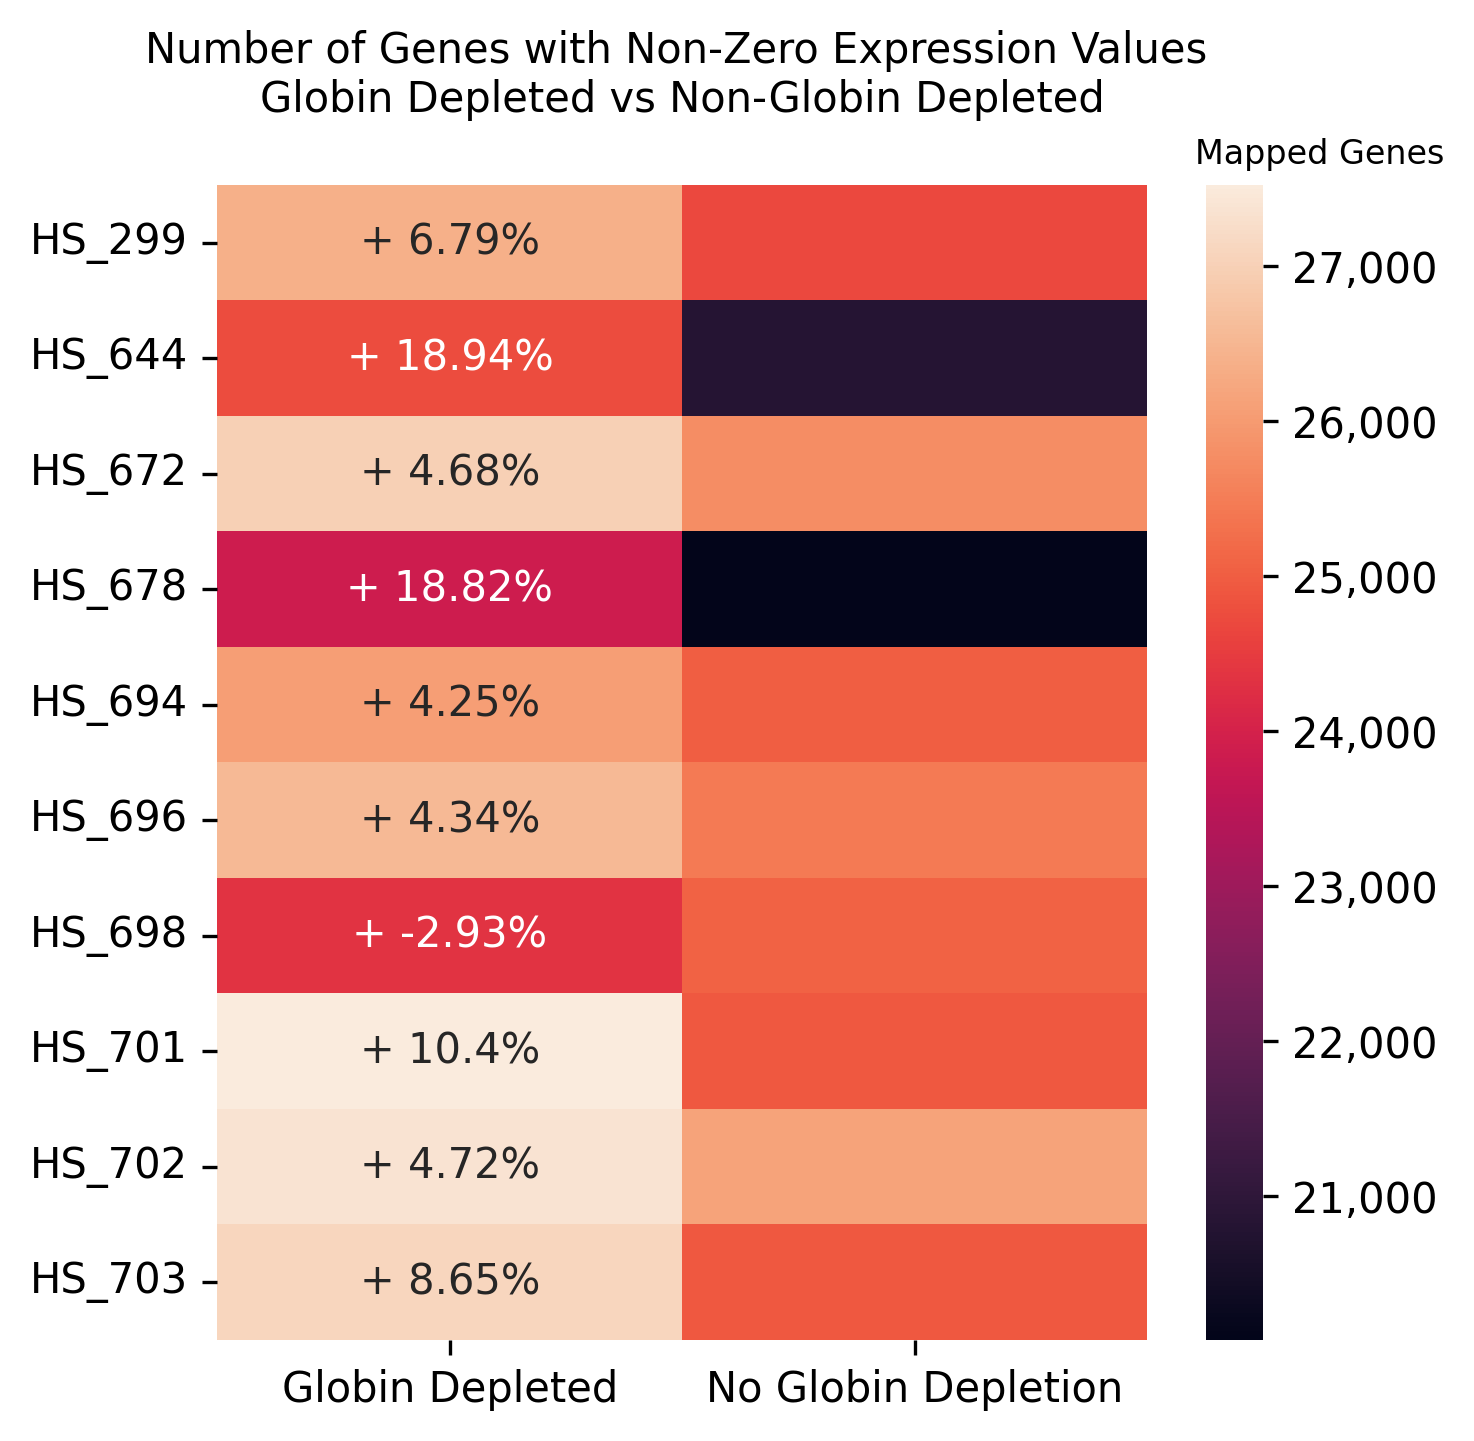

In [89]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize = (5,5), dpi = 300)
sns.heatmap(df[["Globin Depleted", "No Globin Depletion"]], ax = ax, annot = annot_data.T, fmt = '')
ax.set_title("Number of Genes with Non-Zero Expression Values \nGlobin Depleted vs Non-Globin Depleted\n", fontsize = 10)
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))
cbar.ax.set_title('                Mapped Genes', fontsize=8, pad=5)

In [10]:
pbmc.columns = pbmc.columns + '_a'

In [14]:
combined = pd.concat([pbmc, skin], axis = 1)

In [15]:
combined.to_csv("combined.csv")

In [3]:
pd.read_csv("globin_clear_unique.csv")

,Unnamed: 0,symbol
0,ENSG00000259013,ENSG00000259013
1,ENSG00000223523,ENSG00000223523
2,ENSG00000260021,ENSG00000260021
3,ENSG00000200142,Y_RNA
4,ENSG00000198765,SYCP1
...,...,...
4377,ENSG00000248951,MTCO2P32
4378,ENSG00000235804,ENSG00000235804
4379,ENSG00000168992,OR7E102P
4380,ENSG00000213653,RPL22P22


In [4]:
pd.read_csv("non_globin_clear_unique.csv")

,Unnamed: 0,symbol
0,ENSG00000289385,ENSG00000289385
1,ENSG00000260990,ENSG00000260990
2,ENSG00000278013,ENSG00000278013
3,ENSG00000139515,PDX1
4,ENSG00000229950,TFAP2A-AS1
...,...,...
2398,ENSG00000187766,KRTAP10-8
2399,ENSG00000228819,AGKP2
2400,ENSG00000225625,ENSG00000225625
2401,ENSG00000227709,SNRNP40P1
